In [10]:
import matplotlib.image as mpimg
import os

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow import keras
from tensorflow.keras.layers import Rescaling
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from glob import glob
import cv2

In [24]:
import zipfile

with zipfile.ZipFile("/content/traffic_Data.zip", "r") as zip_ref:
    zip_ref.extractall("/content/")

In [25]:
dataset = '../content/traffic_Data/DATA'

In [26]:
labelfile = pd.read_csv('/content/labels.csv')

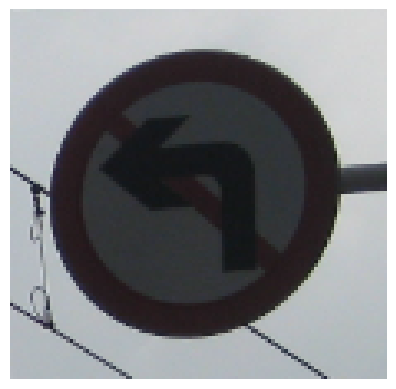

In [28]:
import cv2
import matplotlib.pyplot as plt

img_path = "/content/DATA/11/011_0011.png"
img = cv2.imread(img_path)

if img is None:
    print("Error: Image not found. Check the file path.")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib
    plt.imshow(img)
    plt.axis("off")  # Hide axes
    plt.show()

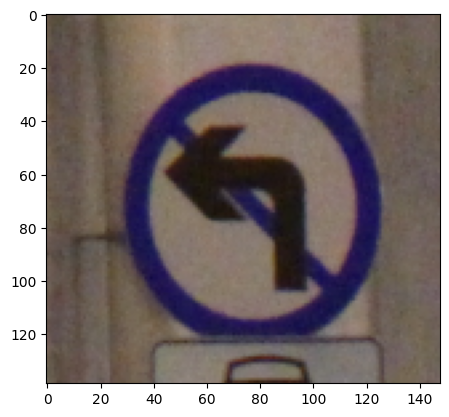

In [29]:
img = cv2.imread("/content/DATA/11/011_0006.png")
plt.imshow(img)

In [30]:
labelfile.head()

ClassId                  Name
0        0   Speed limit (5km/h)
1        1  Speed limit (15km/h)
2        2  Speed limit (30km/h)
3        3  Speed limit (40km/h)
4        4  Speed limit (50km/h)

In [31]:
labelfile.tail()

ClassId         Name
53       53     Give Way
54       54  No stopping
55       55     No entry
56       56     Unknown7
57       57     Unknown8

In [33]:
import tensorflow as tf

dataset = "/content/DATA"  # Set correct dataset path

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [34]:
class_numbers = train_ds.class_names
class_names = []
for i in class_numbers:
    class_names.append(labelfile['Name'][int(i)])

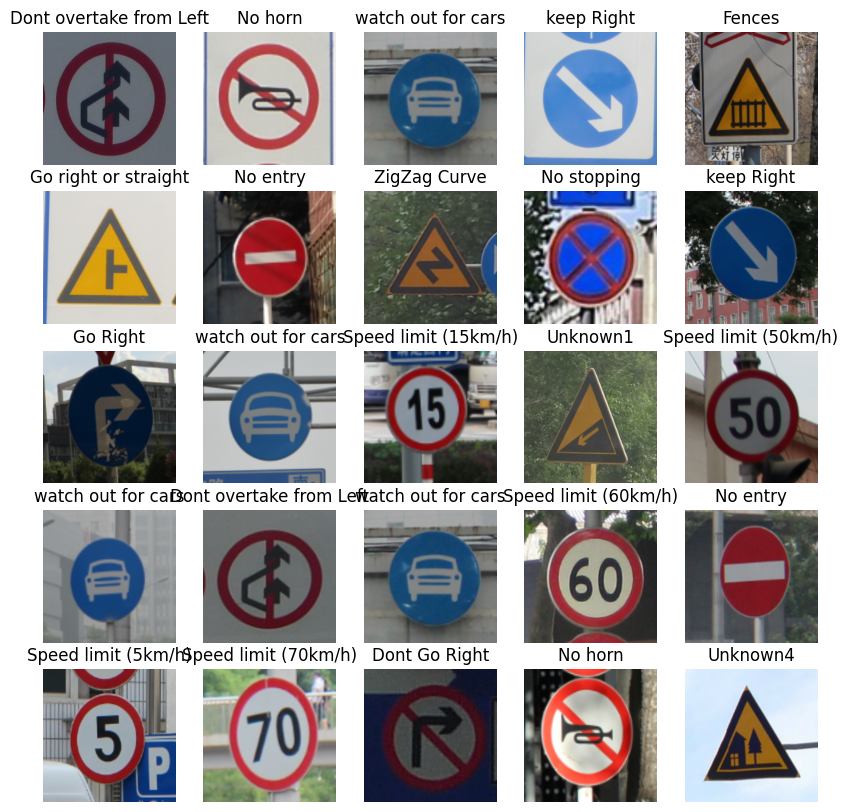

In [35]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()

In [37]:
import tensorflow as tf

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal", input_shape=(224, 224, 3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomFlip("horizontal_and_vertical")  # No 'mode' argument needed
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model = Sequential()
model.add(data_augmentation)
model.add(Rescaling(1./255))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(labelfile), activation='softmax'))


In [39]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,359,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 58)                  │           7,482 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,821,562 (10.76 MB)

 Trainable params: 2,821,562 (10.76 MB)

 Non-trainable params: 0 (0.00 B)

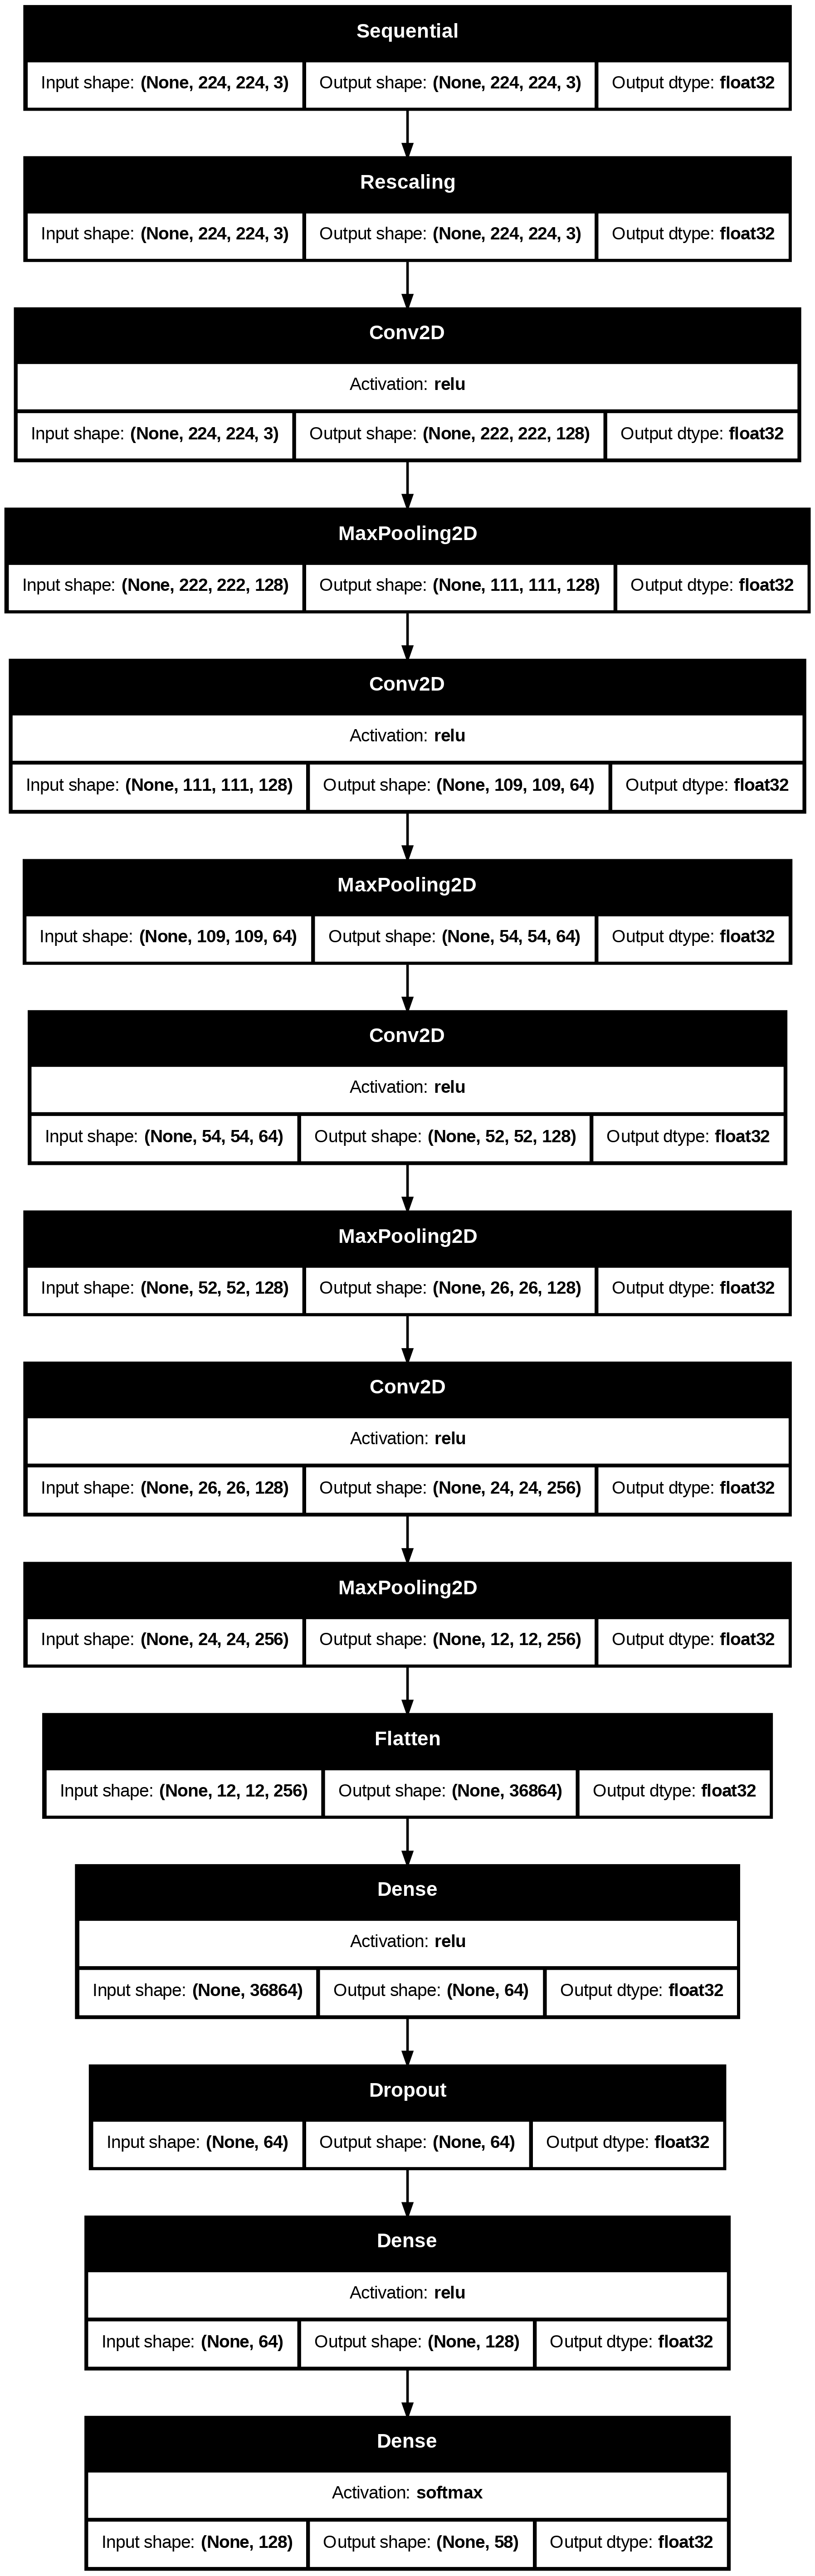

In [40]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [41]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

In [43]:
# Set callback functions to early stop training
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]
history = model.fit(train_ds,
                 validation_data=val_ds,
                 epochs=10,
                 callbacks=mycallbacks)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - accuracy: 0.7400 - loss: 0.7624 - val_accuracy: 0.8705 - val_loss: 0.4285
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 117ms/step - accuracy: 0.7580 - loss: 0.7269 - val_accuracy: 0.8609 - val_loss: 0.4006
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - accuracy: 0.7846 - loss: 0.6468 - val_accuracy: 0.8789 - val_loss: 0.3752
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 118ms/step - accuracy: 0.7825 - loss: 0.6544 - val_accuracy: 0.8741 - val_loss: 0.4104
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - accuracy: 0.7828 - loss: 0.6241 - val_accuracy: 0.8909 - val_loss: 0.3363
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - accuracy: 0.7899 - loss: 0.6021 - val_accuracy: 0.8981 - val_loss: 0.3095
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - accuracy: 0.8179 - loss: 0.5430 - val_accuracy: 0.8765 - val_loss: 0.3441
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - accuracy: 0.8192 - loss: 0

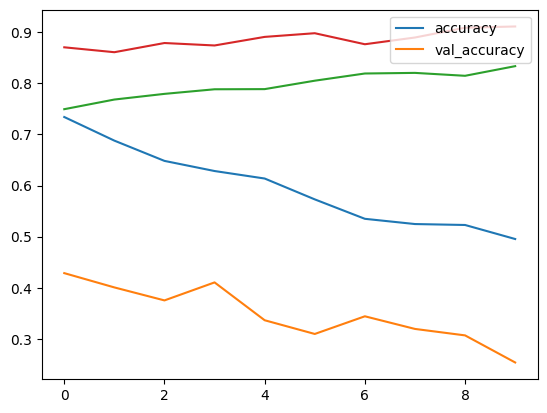

In [45]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper right')

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')
